# **Бинарная классификация с помощью линейной модели**

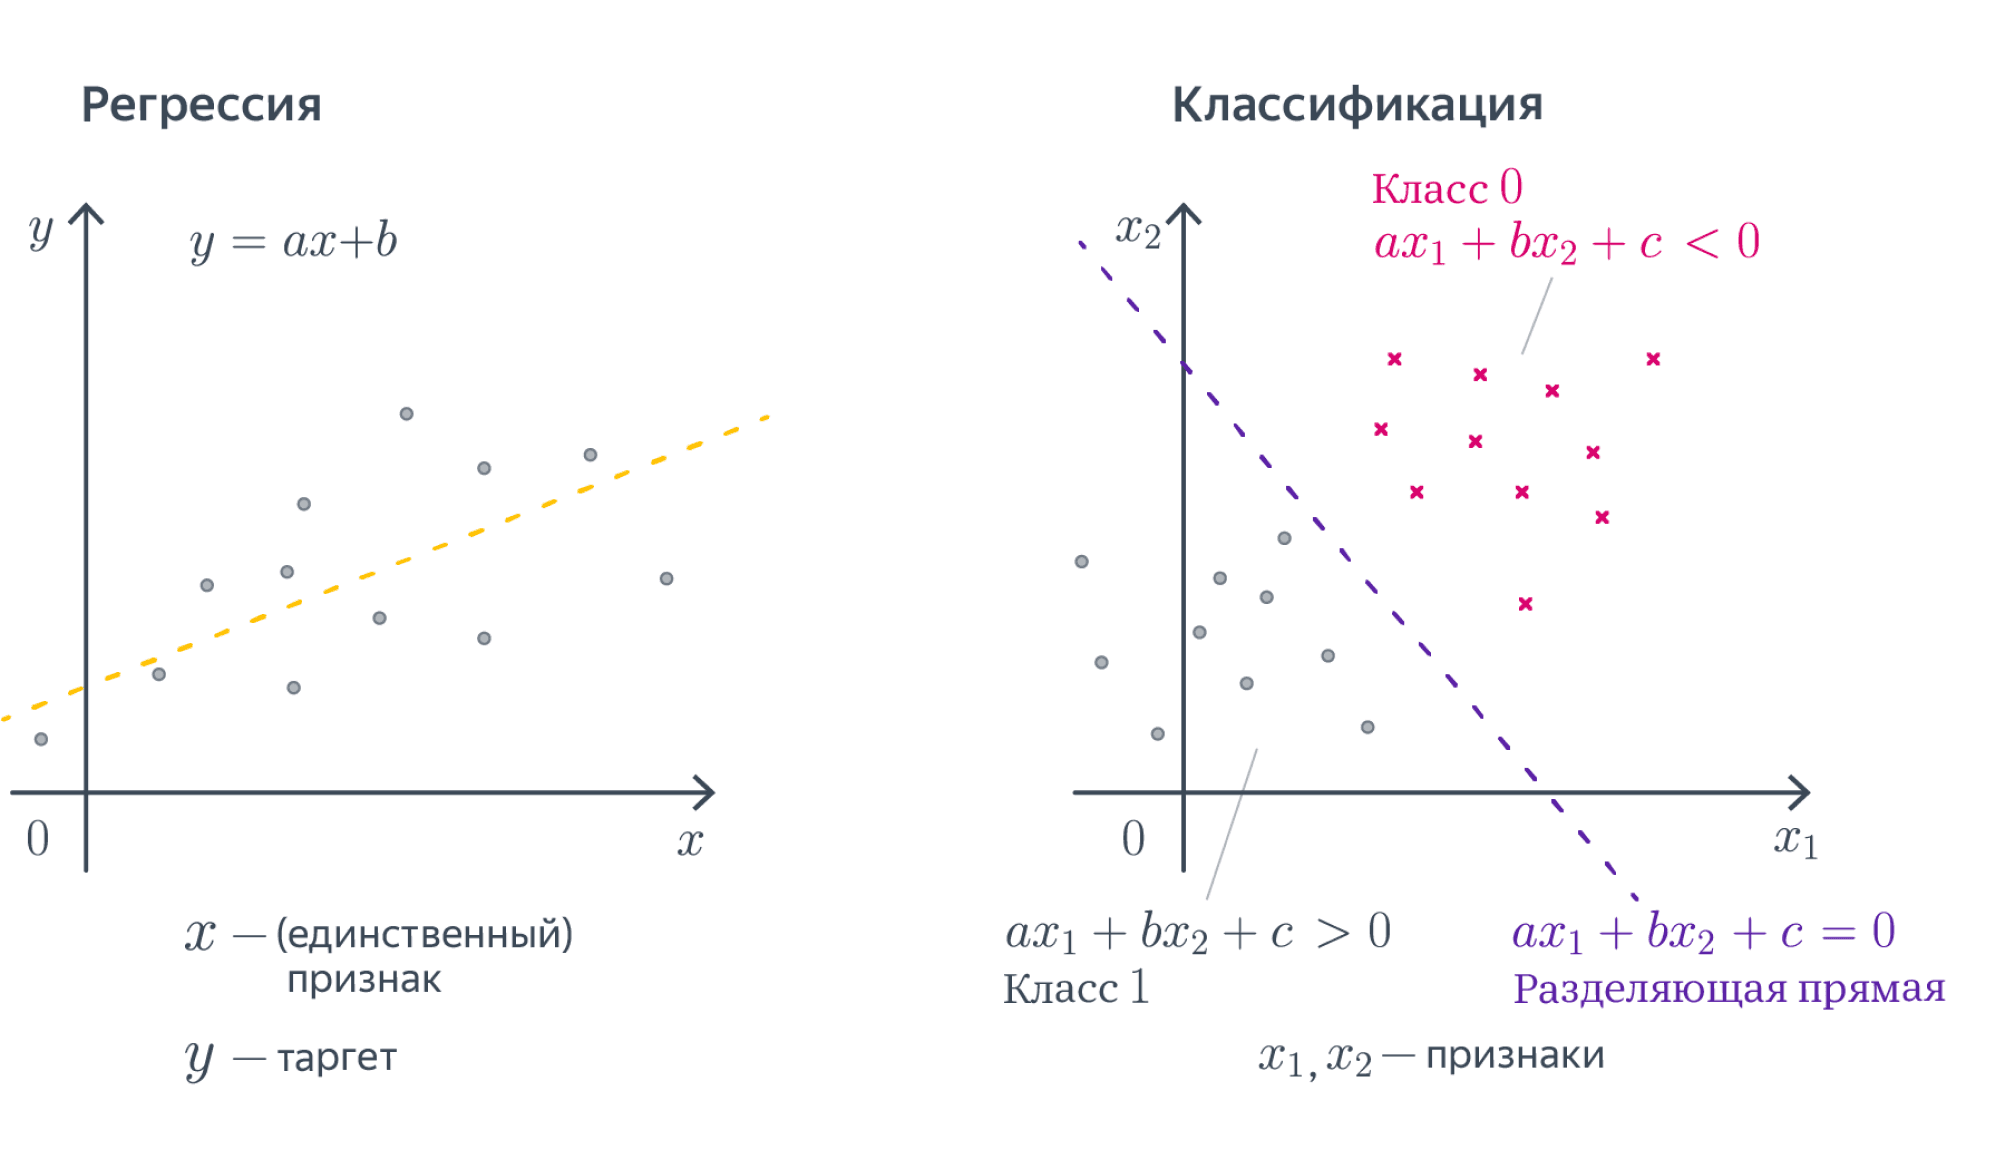

Пример бинарной классификации: классификатор, который бы отличал гусениц от божьих коровок по двум результатам измерений: ширины и длины. 

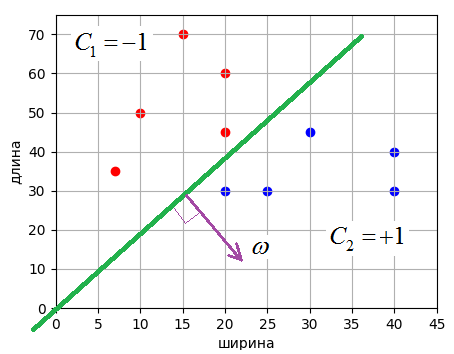

In [ ]:
from sklearn import datasets

X, y = datasets.make_classification(
    n_samples = 20,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_classes = 2,
    random_state = 2,
)


In [ ]:
y

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
for i in range(len(y)):
  if (y[i] == 1):
    y[i] = -1
  if (y[i] == 0):
    y[i] = 1
y

array([-1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1])

In [ ]:
X

array([[ 0.24306743, -0.52734094],
       [ 0.96417816, -0.37583852],
       [-1.08486058,  0.00847624],
       [-0.90653761,  3.3851625 ],
       [ 1.33279979,  1.25629151],
       [ 0.72576002,  0.53047004],
       [-0.77546276, -0.9788468 ],
       [ 1.03317819, -0.88253973],
       [ 1.39939732,  3.2047161 ],
       [-0.07784592, -0.67730036],
       [ 1.2610877 , -1.3003902 ],
       [-2.44391337, -0.56099989],
       [-1.11064538,  0.7571574 ],
       [-0.90474756,  0.59452911],
       [-2.51019507, -0.30991259],
       [ 0.9153728 ,  0.08016006],
       [ 1.28700068, -1.90827144],
       [-1.94625628, -0.53314708],
       [-0.91390999,  2.05571391],
       [-1.33222706, -0.85982898]])

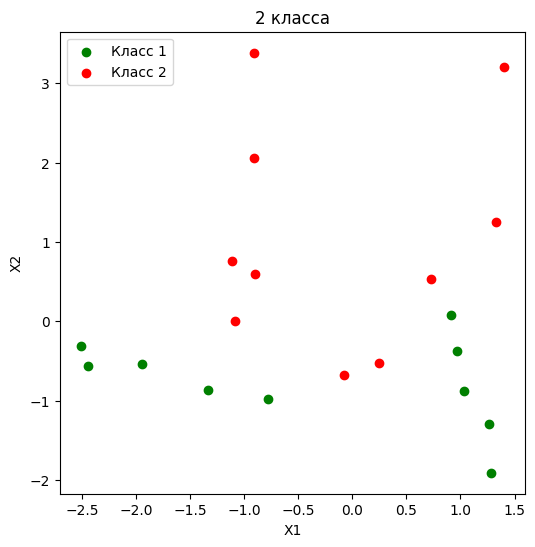

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Класс 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Класс 2')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('2 класса')
plt.legend();

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import itertools
import numpy as np

a_variants = np.arange(-1, 1.1, 0.1)

ab_combinations1 = pd.DataFrame(itertools.product([0]), columns=['a'])
ab_combinations2 = pd.DataFrame(itertools.product(a_variants), columns=['a'])
ab_combinations_frame = pd.concat([ab_combinations1, ab_combinations2], ignore_index=True)
ab_combinations_frame['x1'] = [-3] * len(ab_combinations_frame)
ab_combinations_frame['x2'] = [2] * len(ab_combinations_frame)
ab_combinations_frame['y1'] = ab_combinations_frame['a'] * ab_combinations_frame['x1']
ab_combinations_frame['y2'] = ab_combinations_frame['a'] * ab_combinations_frame['x2']
ab_combinations_frame.drop_duplicates(inplace=True)

trace_list = []

for i in range(len(ab_combinations_frame)):
  trace_list.append(go.Scatter(visible=False, x=ab_combinations_frame.iloc[i][['x1', 'x2']], y=ab_combinations_frame.iloc[i][['y1', 'y2']], mode='lines'))

trace_list.append(go.Scatter(x=X[y == -1, 0], y=X[y ==-1, 1], mode='markers', name="Класс 1", visible=True))
trace_list.append(go.Scatter(x=X[y == 1, 0], y=X[y == 1, 1], mode='markers', name="Класс 2", visible=True))

fig = go.Figure(data=trace_list)

a_steps = []
for a in a_variants:
    step = dict(method="update",
                args=[{"visible": [*list(ab_combinations_frame.a == a), True, True]}],
                label=str(a.round(2)))
    a_steps.append(step)
    
sliders = [dict(active=10,
                currentvalue={"prefix": "a-coefficient: "},
                pad={"t": 40},
                steps=a_steps),
           ]

fig.update_layout(xaxis_title="x1",
                  yaxis_title="x2",
                  sliders=sliders, 
                  margin=dict(l=10, r=10, t=30, b=10),
                  title='$$f = ax$$', title_x=0.5, 
                  height=800,
                  width=800)


fig.update_yaxes(range=[-2, 3.5])
fig.update_xaxes(range=[-3, 2])
fig.show()

Для решения задачи бинарной классификации необходимо найти уравнение гиперплоскости, которая будет разделять плоскость на 2 области. 

Уравнение гиперплоскости будет иметь вид:
x1*w1 + x2*w2 + x3*w3...+xn*wn = 0
где xi- i-ый признак, wi - вес признака

Рассмотрим случай с 2 признаками: х1 и х2. Тогда уравнение примет вид:
x1*w1 + x2*w2  = 0
В этом случае гиперплоскость является прямой:
при w2=-1:
x2 = x1*w1 (аналог y = kx)

Гиперплоскость определяется скалярным произведением вектора признаков и вектора весов:
<x,w> = 0

Если <x,w> < 0 - объект находится слева от гиперплоскости

Если <x,w> > 0 - объект находится справа от гиперплоскости


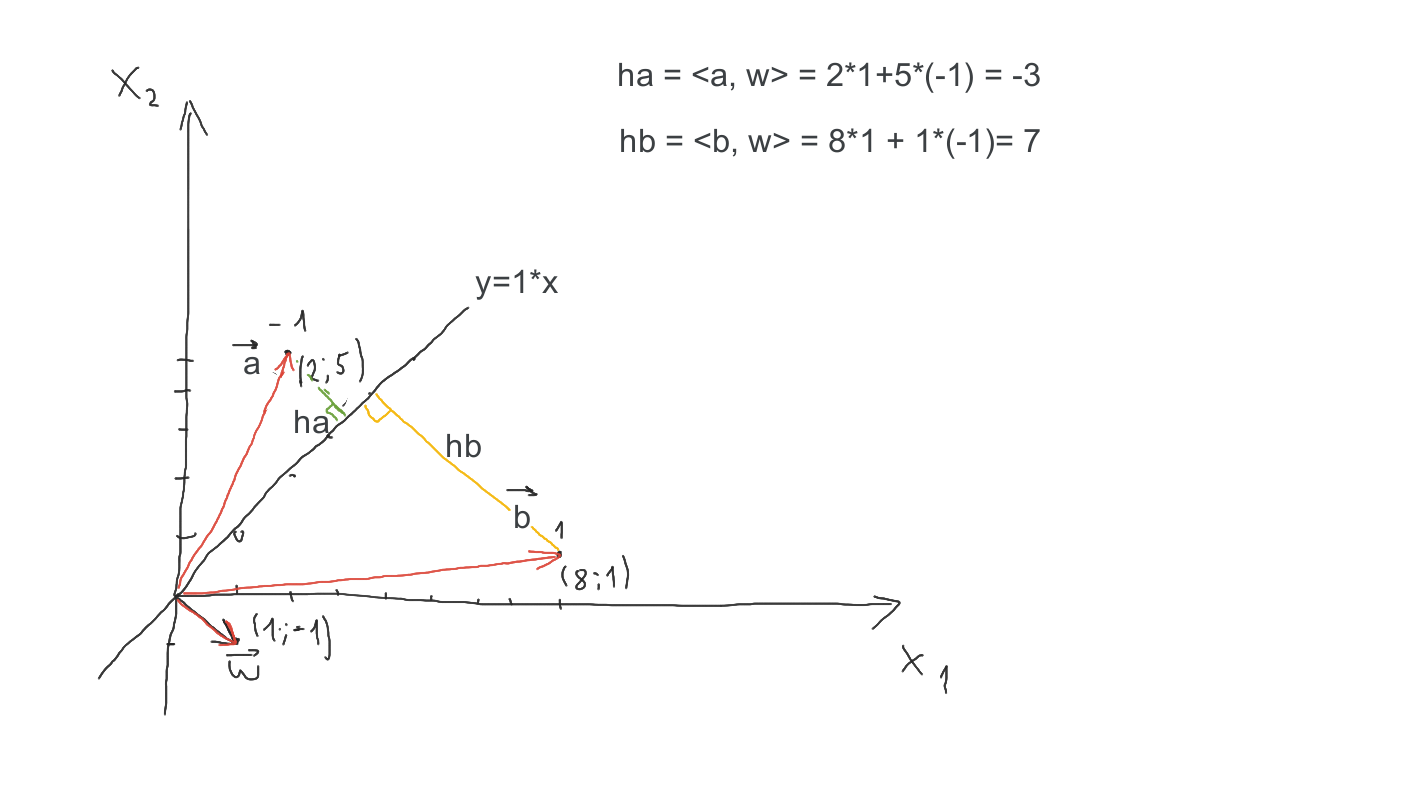

In [ ]:
def vect_mult(a, b):
  return a[0]*b[0] + a[1]*b[1]

In [ ]:
w1 = -1
min = 1000
while w1 < 1:
  cnt = 0
  w = [w1 , -1]
  for i in range(len(X)):
    if ((vect_mult(w, X[i]))*y[i] < 0):
      cnt += 1
  print(f"w1 = {w1:.1f} Количество ошибок {cnt}")
  if (cnt < min):
    min = cnt
    w1_min = w1
  w1 += 0.1
print(f"Оптимальное значение коэффициента w1 = {w1_min:.1f}")

w1 = -1.0 Количество ошибок 5
w1 = -0.9 Количество ошибок 5
w1 = -0.8 Количество ошибок 5
w1 = -0.7 Количество ошибок 5
w1 = -0.6 Количество ошибок 7
w1 = -0.5 Количество ошибок 7
w1 = -0.4 Количество ошибок 7
w1 = -0.3 Количество ошибок 7
w1 = -0.2 Количество ошибок 7
w1 = -0.1 Количество ошибок 7
w1 = -0.0 Количество ошибок 8
w1 = 0.1 Количество ошибок 8
w1 = 0.2 Количество ошибок 8
w1 = 0.3 Количество ошибок 8
w1 = 0.4 Количество ошибок 8
w1 = 0.5 Количество ошибок 8
w1 = 0.6 Количество ошибок 8
w1 = 0.7 Количество ошибок 8
w1 = 0.8 Количество ошибок 7
w1 = 0.9 Количество ошибок 7
w1 = 1.0 Количество ошибок 6
Оптимальное значение коэффициента w1 = -1.0


Список источников:
1. https://academy.yandex.ru/handbook/ml/article/linear-models
2. https://www.youtube.com/watch?v=4z8VSsvZGKs&list=PLA0M1Bcd0w8zxDIDOTQHsX68MCDOAJDtj&index=7&ab_channel=selfedu
3. https://www.youtube.com/watch?v=VF4newaSUYQ&t=970s&ab_channel=%D0%A4%D0%9A%D0%9D%D0%92%D0%A8%D0%AD%E2%80%94%D0%B4%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8F
4. https://www.youtube.com/watch?v=CCH-1gJo_z0&list=PLkJJmZ1EJno6CLyvD4DHc32Fed6cPBHje&ab_channel=machinelearrrning
